In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp 

In [3]:
def f(r,V,k,m,a,c,α):
    Γtr_t = (m * r * (r**5 + 2 * m * r**4 - 2 * m * a**2 * r**2 ))\
    /(r**2 * (r**6 - 4 * m**2 * r**4 + 4 * a**2 * m**2 * r**2)); 
    Γrt_t = Γtr_t;
    Γrϕ_t = -(m * a * r * (3 * r + 4 * m))\
    /(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2); 
    Γϕr_t = Γrϕ_t;
    Γtt_r = (m)/(r * (r**2 + 2*m)); 
    Γtϕ_r = - (m * a)/(r * (r + 2 * m));
    Γϕt_r = Γtϕ_r;
    Γrr_r = - (m)/(r * (r + 2 * m));  
    Γrz_z = Γrr_r;
    Γzr_z = Γrr_r;
    Γzz_r = -Γrr_r ;
    Γϕϕ_r = -(r * (r + m))/(r + 2 * m);
    Γtr_ϕ = (a * m)/(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2); 
    Γrt_ϕ = Γtr_ϕ;
    Γrϕ_ϕ = -(r**3 * m - r**4 + 2 * r**2 * m**2 + 2 * a**2 * m**2)\
    /(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2); 
    Γϕr_ϕ = Γrϕ_ϕ;
    g_tϕ = r/(2*m*a);
    g_ϕϕ = -1.0/(r**2 + 2*m*r);
    g_rr = -r/(r+2*m);
    ρ = r**-1.5;
    dρ = -1.5*(r**-2.5);
    P = k*(r**-2.5);
    dP = -2.5*k*(r**-3.5);
    Vr,Vϕ,Bϕ = V;
    γ = 1/(np.sqrt(1 - (Vr**2 + Vϕ**2)));
    U0 = γ;  
    Ur = γ*Vr;    
    Uϕ = γ*Vϕ;
    L1 = Vr*(dρ+dP) + (ρ+P)*Vr*(Γrr_r+Γϕr_ϕ+Γzr_z-Γrt_t-Vϕ*(Γrϕ_t+Γϕr_t));
    Bd = (Bϕ*r**2)/(4*np.pi * (r+2*m)**2);
    L3 = (4*m/(r*(r+2*m))) - (Γtr_t + Γϕr_ϕ+Γrz_z + Γrr_r);
    dBϕdr = (-((Bd)*( r/(r+2*m) + 2*Vr*U0*Ur ))**-1)*\
    ((ρ+P)*U0**2 * ((-1.0/(ρ+P))*(L1 + (2*Ur*Bϕ/U0)*Bd*L3)*Vr +\
    Γtt_r - 2*Γtr_t*Vr**2 + 2*Vϕ*Γtϕ_r+Γrr_r*Vr**2 - Γϕr_t*Vϕ*Vr**2 - Γrϕ_t*Vϕ*Vr**2+\
    Γϕϕ_r*Vϕ**2) + (r/(r+2*m))*dP - (r/(r+2*m))*(L3));
    L2 = -(-dBϕdr/Bϕ - (4*m/(r*(r+2*m))) - (Γtr_t + Γϕr_ϕ+Γrz_z + Γrr_r));
    dVrdr = (-1.0/(ρ+P))*(L1 + (2*Bϕ*Ur/U0)*Bd*L2);
    dVϕdr = -2*Γtr_ϕ + 2*Γtr_t*Vϕ-Vϕ*Γϕr_ϕ+Γϕr_t*Vϕ**2-Γrϕ_ϕ*Vϕ+Γrϕ_t*Vϕ**2 -\
    (1./(Vr*(ρ+P)*U0**2))*(g_tϕ + g_ϕϕ - (Ur+Uϕ)*Uϕ)*(2*Γϕr_ϕ*α*P - 2*α*dP);
    dVdr = [dVrdr,dVϕdr,dBϕdr]
    return dVdr

In [4]:
f(1,[-0.12,0.918,0],0.364,1e3,0.2,1,0.5)

/tmp/ipykernel_7301/2053453928.py:36: RuntimeWarning: divide by zero encountered in scalar power
  dBϕdr = (-((Bd)*( r/(r+2*m) + 2*Vr*U0*Ur ))**-1)*\
/tmp/ipykernel_7301/2053453928.py:41: RuntimeWarning: invalid value encountered in scalar multiply
  dVrdr = (-1.0/(ρ+P))*(L1 + (2*Bϕ*Ur/U0)*Bd*L2);


[nan, -6.515664617823212, inf]

In [9]:
# f(r,V,k,m,a,c,α)
V = solve_ivp(fun=f, t_span=[7.1,100.2], y0=[-0.4,0.4,100],
              args=(0.364,1e7,0.9,1,0.9), dense_output=False)  
# m=1e7
# vϕ = 0.618   Vr = 0.48

# y0=[-0.5,0.8660,100]

/tmp/ipykernel_7301/2053453928.py:29: RuntimeWarning: invalid value encountered in sqrt
  γ = 1/(np.sqrt(1 - (Vr**2 + Vϕ**2)));


In [6]:
# Vϕ = 0.2
P1 = V

In [8]:
# Vϕ = 0.7
P2 = V

In [10]:
# Vϕ = 0.8
P3 = V 

In [116]:
dim = min(P1.y.shape[1], P2.y.shape[1], P3.y.shape[1])
dim

82

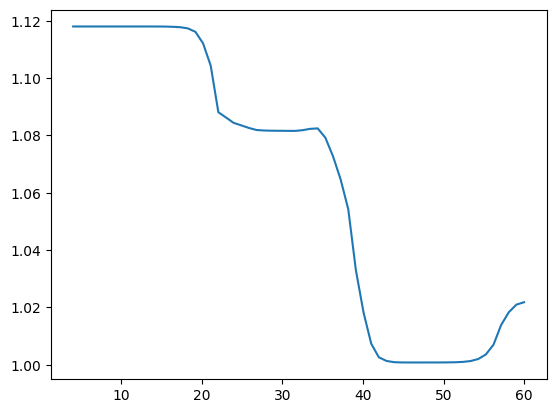

In [11]:
# gamma 
# dim = min(P1.y.shape[1], P2.y.shape[1], P3.y.shape[1])
dim=60
gamma = 1./(np.sqrt(1-(P1.y[0,0:dim]**2 + P1.y[1,0:dim]**2)))
t  = np.linspace(4,60,dim)

Ur = gamma*P1.y[0,0:dim]
# plt.plot(t,Ur)
plt.plot(t,gamma)
plt.show()


In [15]:
dim = min(P1.y.shape[1], P2.y.shape[1], P3.y.shape[1])
# dim = 50
dim

82

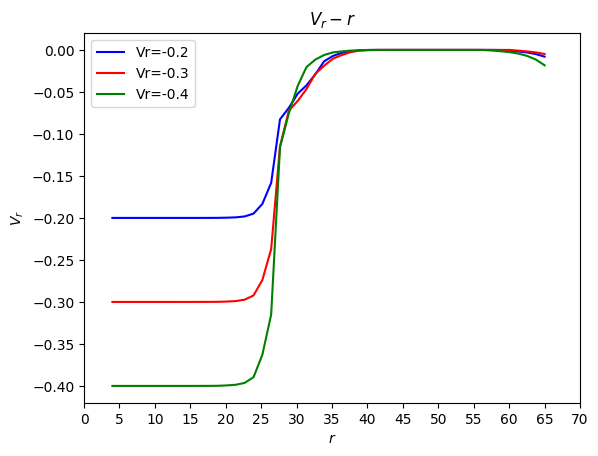

In [51]:
# dim = min(P1.y.shape[1], P2.y.shape[1], P3.y.shape[1])
dim = 50
# t = np.linspace(4,100,50)
t = np.linspace(4,65,dim)
plt.plot(t,P1.y[0,0:dim],'b',label="Vr=-0.2")
plt.plot(t,P2.y[0,0:dim],'r',label="Vr=-0.3")
plt.plot(t,P3.y[0,0:dim],'g',label="Vr=-0.4")
plt.legend()
plt.xlabel(r"$r$")
plt.xlim(0,70)
plt.xticks(np.arange(0,71,5))
# plt.ylabel(r"$V_r$")
# plt.ylabel(r"$V_ϕ$")
plt.ylabel(r"$V_r$")

# plt.title(r"$V_r - r$")
# plt.title(r"$V_ϕ - r$")
plt.title(r"$V_r - r$")
# plt.show()
plt.savefig("Vr_r")

In [22]:
np.all(P1.y[0,0:dim] == 0)

False

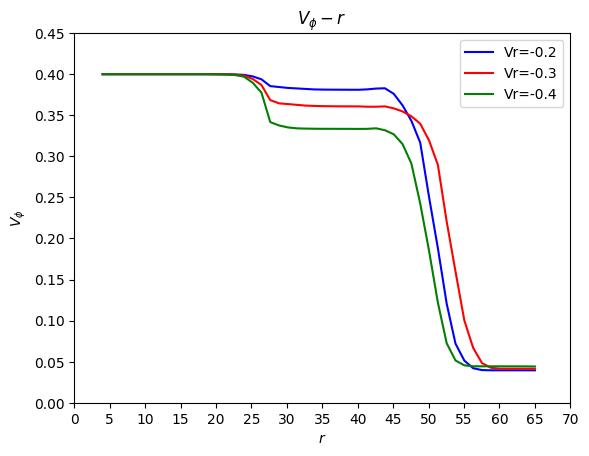

In [52]:
# dim = min(P1.y.shape[1], P2.y.shape[1], P3.y.shape[1])
dim = 50
# t = np.linspace(4,100,50)
t = np.linspace(4,65,dim)
plt.plot(t,P1.y[1,0:dim],'b',label="Vr=-0.2")
plt.plot(t,P2.y[1,0:dim],'r',label="Vr=-0.3")
plt.plot(t,P3.y[1,0:dim],'g',label="Vr=-0.4")
plt.legend()
plt.xlabel(r"$r$")
plt.xlim(0,70)
plt.xticks(np.arange(0,71,5))
plt.ylabel(r"$V_ϕ$")
plt.ylim(0,0.45)
plt.yticks(np.arange(0,0.46,0.05))
plt.title(r"$V_ϕ - r$")
# plt.show()
plt.savefig("Vϕ_r")

In [38]:
 dim = min(P1.y.shape[1], P2.y.shape[1], P3.y.shape[1])
dim

82

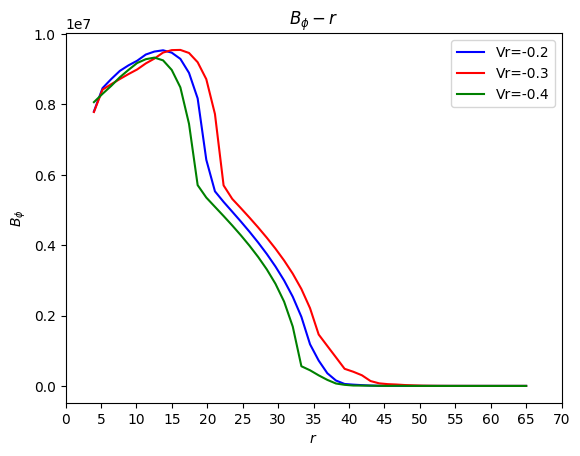

In [53]:
# dim = min(P1.y.shape[1], P2.y.shape[1], P3.y.shape[1])
dim = 82
# t = np.linspace(4,100,50)
t = np.linspace(4,65,51)
plt.plot(t,P1.y[2,31:dim],'b',label="Vr=-0.2")
plt.plot(t,P2.y[2,31:dim],'r',label="Vr=-0.3")
plt.plot(t,P3.y[2,31:dim],'g',label="Vr=-0.4")
plt.legend()
plt.xlabel(r"$r$")
plt.xlim(0,70)
plt.xticks(np.arange(0,71,5))

plt.ylabel(r"$B_ϕ$")
# plt.ylim(8e6,1e7)
# plt.title(r"$V_r - r$")
# plt.title(r"$V_ϕ - r$")
plt.title(r"$B_ϕ - r$")
# plt.show()
plt.savefig("Bϕ_r")

In [ ]:
axes.plot(tlist, result.expect[2], label=r"$\left<\sigma_z\right>$")
axes.plot(tlist, result.expect[1], label=r"$\left<\sigma_y\right>$")
axes.plot(tlist, result.expect[0], label=r"$\left<\sigma_x\right>$")

axes.set_xlabel(r"$t$", fontsize=20)
axes.legend(loc=2);


